# Python Verification scripts
- All scripts here are used for local verification
- It serves also as demonstration that a model can be learned in the cloud based enviroment and used elsewhere
- This script mut be adapated to your local paths were the images/scans are located
- All notebooks are written in Python, and use Jupyter project - https://jupyter.org/
- These notebooks can be used in Linux, Windows, MacOs

In [ ]:
import tensorflow as tf
print(tf.__version__)
# this enables Intellisense functionality
%config IPCompleter.greedy=True

# Verification Sigmoid/Binary Classification analysis BesBos
- This is verification script for the binary classification
- It just predict how much the class is a bonescan or a besilesomab scan

In [ ]:
import PIL.Image as Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

# we get all the files for verification
testPath = 'c:/temp/offline/test'
model_path = 'c:/temp/offline/besbos_25e.h5'
pathFile = '{}/{}'

files = os.listdir(testPath);
print(files)

#we load the model we have trained in Google Colab
model = tf.keras.models.load_model(model_path)
# Classes we want to detect
class_names=['bes','bos']
#we define the result as two dimensional array of strings
result = np.empty(shape=(len(files),2),dtype=object)

#method to handle the image and then predict it what it is
def predictImage(fileName,index):
  img = tf.keras.preprocessing.image.load_img(fileName, target_size=(900,252))
  # just plot the image under prediction so it can be also visually analyzed
  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  #load image as array
  Y = tf.keras.preprocessing.image.img_to_array(img)
  #expand the information into one dimensional array for prediction
  X = np.expand_dims(Y,axis=0)
  #predict/infer the loaded image
  val1 = model.predict(X)
  print("prediction tensor",val1)
  score = float(tf.nn.sigmoid(val1[0][0]))
  print("score sigmoid", score)
  print(f"This image {fileName} is {100 * (1 - score):.2f}% besilesomab and {100 * score:.2f}% bonescan.")
  print(f"class:{(class_names[np.argmax(score)])}, {100 * np.max(score)}")
  #we put all results in the list
  result[index]=[fileName,f"{100 * (1 - score):.2f}% / {100 * score:.2f}%"]


index = 0
#iteration over the files
for file in files:
    finalFile = pathFile.format(testPath,file)
    #here we take the image, preprocess it into tensor which can be infered by the learned model
    predictImage(finalFile,index)
    index +=1
print("Final result table:")
#print out the list can be copied into Excel
print(result)

# Verification script for multiclass image classification
- predicts the proabability of the distribution among our 4 classes
- create a directory with all the not trained images
- each scan is printed out and under it is the tensor with the distribution

2025-02-19 11:18:20.034747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-19 11:18:20.188643: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-19 11:18:20.340096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739960300.444870   16242 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739960300.473586   16242 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 11:18:20.722132: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

['negat_bs_ap_106.jpg', 'negat_bs_ap_113.jpg', 'negat_bs_ap_120.jpg', 'negat_bs_ap_123.jpg', 'negat_bs_ap_124.jpg', 'negat_bs_ap_127.jpg', 'negat_bs_ap_13.jpg', 'negat_bs_ap_139.jpg', 'negat_bs_ap_14.jpg', 'negat_bs_ap_147.jpg', 'negat_bs_pa_59.jpg', 'negat_bs_pa_65.jpg', 'negat_bs_pa_67.jpg', 'negat_bs_pa_7.jpg', 'negat_bs_pa_70.jpg', 'negat_bs_pa_75.jpg', 'negat_bs_pa_76.jpg', 'negat_bs_pa_81.jpg', 'negat_bs_pa_84.jpg', 'negat_bs_pa_9.jpg', 'negat_s_ap_1.jpg', 'negat_s_ap_101.jpg', 'negat_s_ap_102.jpg', 'negat_s_ap_109.jpg', 'negat_s_ap_113.jpg', 'negat_s_ap_114.jpg', 'negat_s_ap_115.jpg', 'negat_s_ap_120.jpg', 'negat_s_ap_121.jpg', 'negat_s_ap_123.jpg', 'negat_s_pa_238.jpg', 'negat_s_pa_239.jpg', 'negat_s_pa_240.jpg', 'negat_s_pa_244.jpg', 'negat_s_pa_246.jpg', 'negat_s_pa_247.jpg', 'negat_s_pa_250.jpg', 'negat_s_pa_251.jpg', 'negat_s_pa_253.jpg', 'negat_s_pa_27.jpg', 'posit_bs_ap_1.jpg', 'posit_bs_ap_10.jpg', 'posit_bs_ap_100.jpg', 'posit_bs_ap_101.jpg', 'posit_bs_ap_102.jpg', 'pos

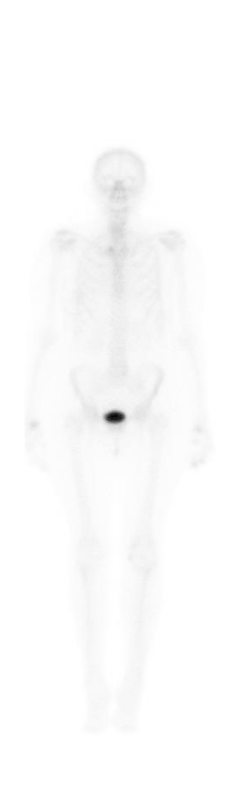

I0000 00:00:1739960307.132186   21222 service.cc:148] XLA service 0x7f07bc050d30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739960307.132720   21222 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-02-19 11:18:27.179340: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739960307.752996   21222 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
prediction tensor: [[-2.5672219 -2.547221   2.0757434  2.1476457]]
score softmax tf.Tensor([0.00459842 0.00469132 0.47755423 0.51315606], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_106.jpg class:bosposit, 51.31560516357422


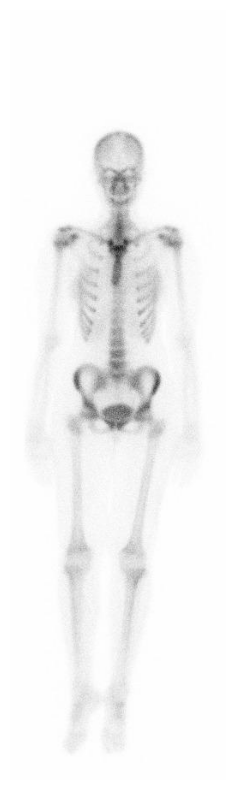

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
prediction tensor: [[-1.9954131 -2.439359   1.9381756  1.0844989]]
score softmax tf.Tensor([0.01342499 0.00861213 0.6858824  0.2920805 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_113.jpg class:bosnegat, 68.58824157714844


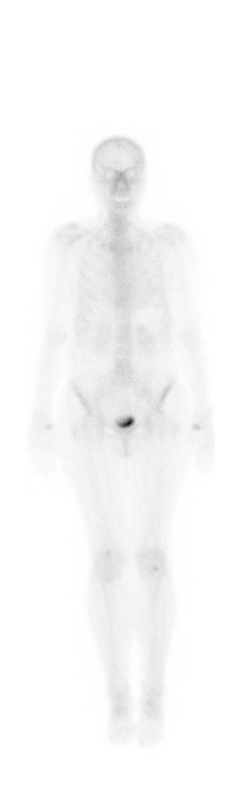

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
prediction tensor: [[-3.5981226 -3.6053874  2.8365176  3.0708086]]
score softmax tf.Tensor([0.00070791 0.00070279 0.44107062 0.5575187 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_120.jpg class:bosposit, 55.75187301635742


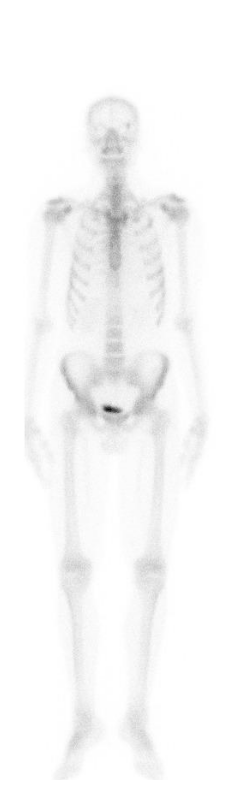

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
prediction tensor: [[-2.0779684 -2.7912564  2.3029368  1.1237199]]
score softmax tf.Tensor([0.00943625 0.00462405 0.7540536  0.23188616], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_123.jpg class:bosnegat, 75.40535736083984


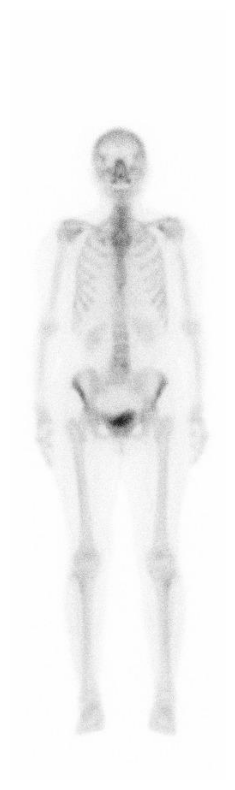

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
prediction tensor: [[-2.9116051 -3.3938994  2.7484667  1.729679 ]]
score softmax tf.Tensor([0.002548   0.00157305 0.7317085  0.26417044], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_124.jpg class:bosnegat, 73.17085266113281


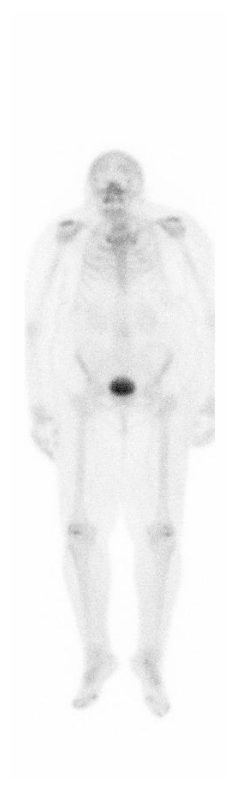

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
prediction tensor: [[-2.695061  -2.7119157  2.1181421  2.496398 ]]
score softmax tf.Tensor([0.00328042 0.00322559 0.40390265 0.5895914 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_127.jpg class:bosposit, 58.959136962890625


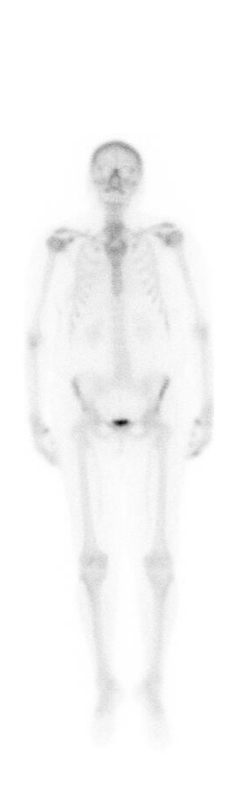

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
prediction tensor: [[-2.388774  -2.751999   1.9435992  2.1165748]]
score softmax tf.Tensor([0.00594106 0.00413159 0.45226178 0.53766555], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_13.jpg class:bosposit, 53.76655578613281


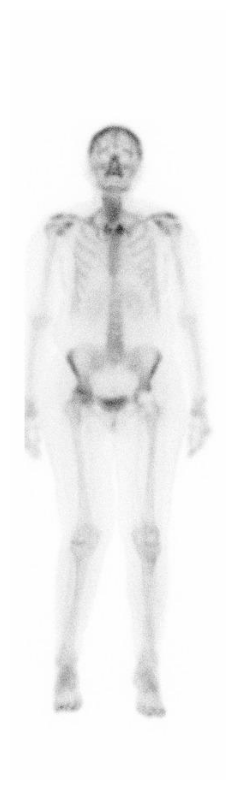

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
prediction tensor: [[-2.4977496 -2.8749182  1.9734856  2.2704496]]
score softmax tf.Tensor([0.00483425 0.00331533 0.42282566 0.5690248 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_139.jpg class:bosposit, 56.90248107910156


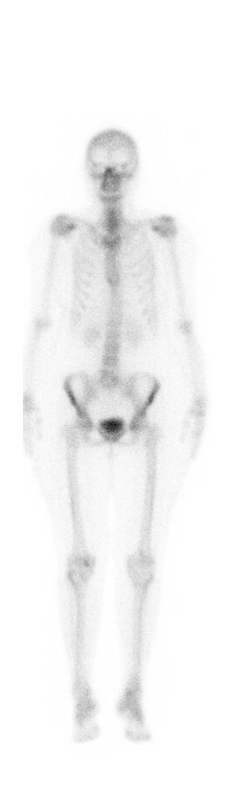

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
prediction tensor: [[-2.165621  -2.2117426  1.6023804  1.8477733]]
score softmax tf.Tensor([0.00994206 0.00949393 0.4304262  0.5501378 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_14.jpg class:bosposit, 55.0137825012207


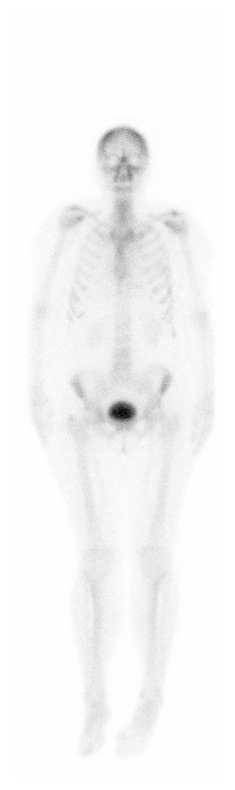

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
prediction tensor: [[-2.8184898 -2.443703   1.7623812  2.7698214]]
score softmax tf.Tensor([0.00272229 0.00396006 0.26569372 0.727624  ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_ap_147.jpg class:bosposit, 72.76239776611328


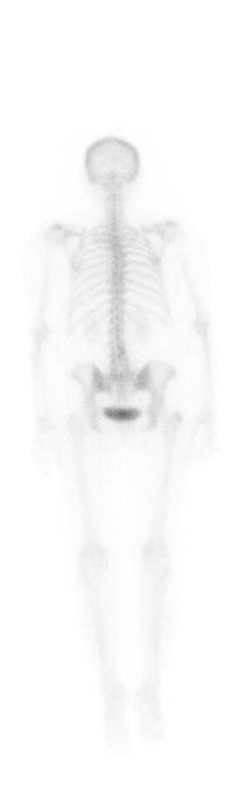

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
prediction tensor: [[-1.6318693 -2.1130843  1.4839641  1.7138746]]
score softmax tf.Tensor([0.0190288  0.01176041 0.42914155 0.5400692 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_59.jpg class:bosposit, 54.00692367553711


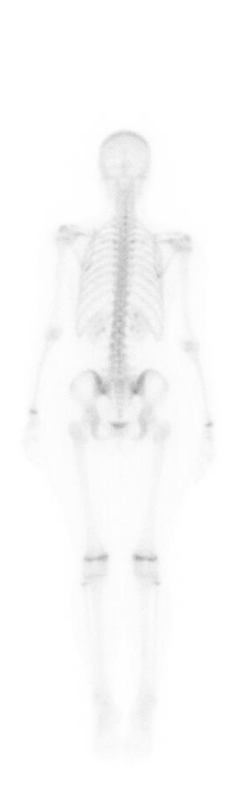

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
prediction tensor: [[-1.6819618 -1.8971139  1.2710814  1.7356718]]
score softmax tf.Tensor([0.01942964 0.01566842 0.3723532  0.5925487 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_65.jpg class:bosposit, 59.2548713684082


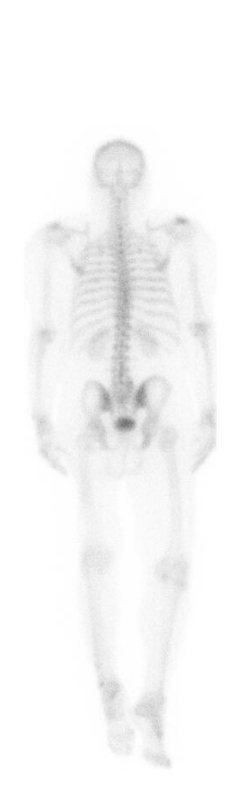

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
prediction tensor: [[-2.396688  -2.5448768  1.7361555  2.5395188]]
score softmax tf.Tensor([0.00491501 0.00423806 0.30647543 0.6843715 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_67.jpg class:bosposit, 68.43714904785156


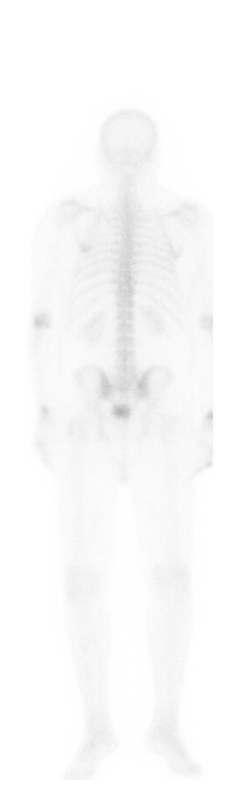

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
prediction tensor: [[-1.6411886 -1.7898333  1.2444158  1.5315713]]
score softmax tf.Tensor([0.02290974 0.01974535 0.41041413 0.5469308 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_7.jpg class:bosposit, 54.693077087402344


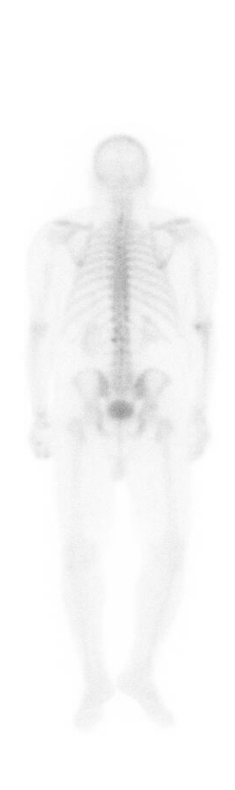

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
prediction tensor: [[-2.2023406 -2.43288    1.7971948  2.0396044]]
score softmax tf.Tensor([0.00794219 0.00630693 0.43342742 0.5523235 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_70.jpg class:bosposit, 55.23235321044922


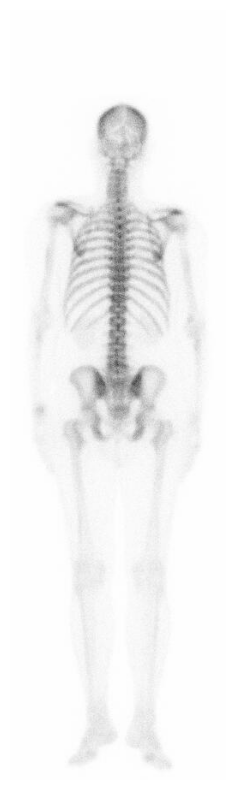

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
prediction tensor: [[-1.2536384 -2.0586889  1.5882461  1.237498 ]]
score softmax tf.Tensor([0.03260503 0.01457658 0.55911285 0.39370552], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_75.jpg class:bosnegat, 55.911285400390625


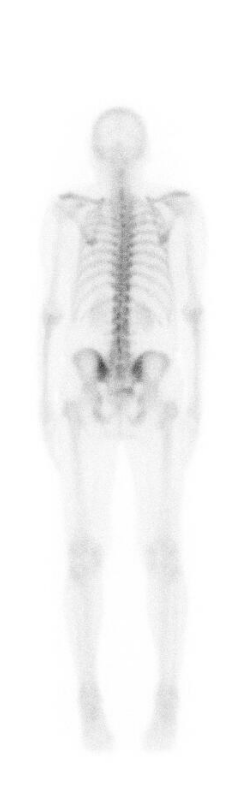

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
prediction tensor: [[-1.8681511 -2.2696538  1.5842243  1.8142401]]
score softmax tf.Tensor([0.01370127 0.00917045 0.43262184 0.54450643], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_76.jpg class:bosposit, 54.45064163208008


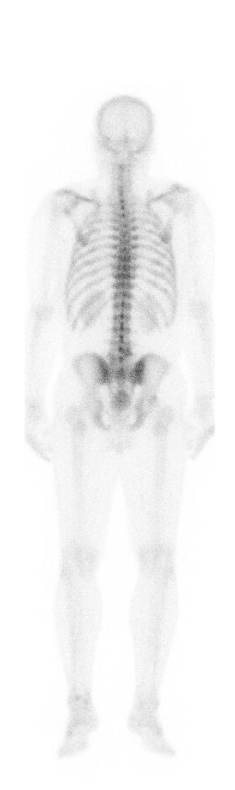

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
prediction tensor: [[-2.0269043 -2.4158053  1.8952999  1.8474674]]
score softmax tf.Tensor([0.00996593 0.00675492 0.5033955  0.47988364], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_81.jpg class:bosnegat, 50.33955001831055


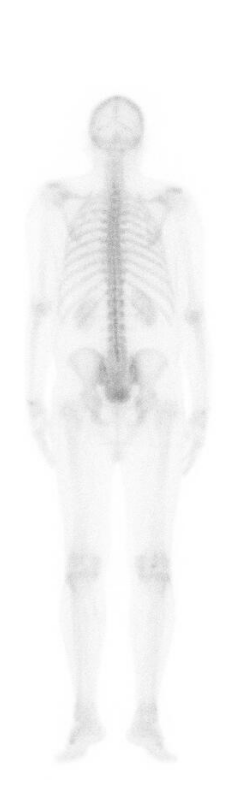

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
prediction tensor: [[-3.2141962 -3.4418337  2.705271   2.6717353]]
score softmax tf.Tensor([0.0013625  0.00108511 0.5071388  0.49041355], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_84.jpg class:bosnegat, 50.7138786315918


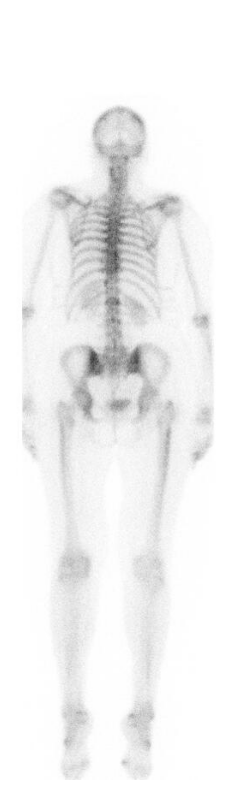

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
prediction tensor: [[-2.5935354 -2.8754494  2.0489142  2.4437952]]
score softmax tf.Tensor([0.00385192 0.00290565 0.39982262 0.5934198 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_bs_pa_9.jpg class:bosposit, 59.34197998046875


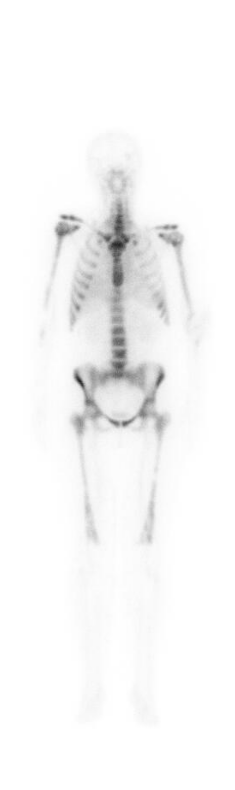

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
prediction tensor: [[ 2.8771367  2.5889366 -2.7777267 -1.6193693]]
score softmax tf.Tensor([0.5668099  0.42488724 0.00198409 0.00631873], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_1.jpg class:besnegat, 56.68098831176758


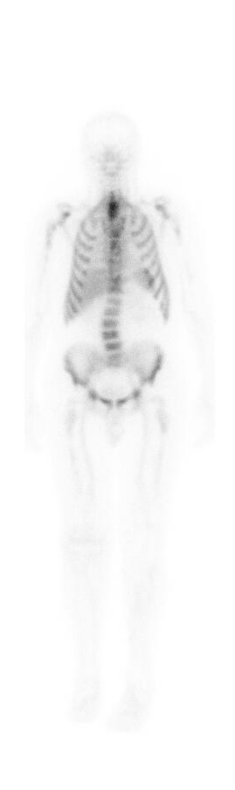

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
prediction tensor: [[ 4.028088   2.5407832 -2.8740823 -1.5439768]]
score softmax tf.Tensor([0.8124868  0.18360649 0.00081704 0.00308958], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_101.jpg class:besnegat, 81.2486801147461


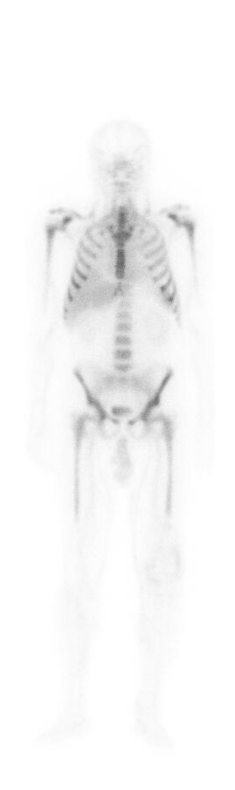

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
prediction tensor: [[ 3.1142776  1.7078575 -1.7446982 -1.3067046]]
score softmax tf.Tensor([0.7906391  0.19372149 0.00613411 0.00950539], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_102.jpg class:besnegat, 79.06391143798828


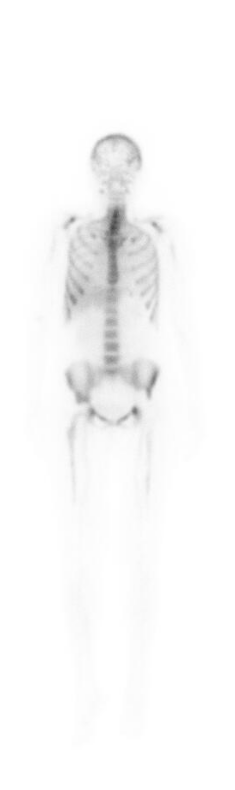

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
prediction tensor: [[ 2.4148264  2.3631542 -2.6925716 -1.5637668]]
score softmax tf.Tensor([0.506482   0.48097563 0.00306513 0.00947726], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_109.jpg class:besnegat, 50.64820098876953


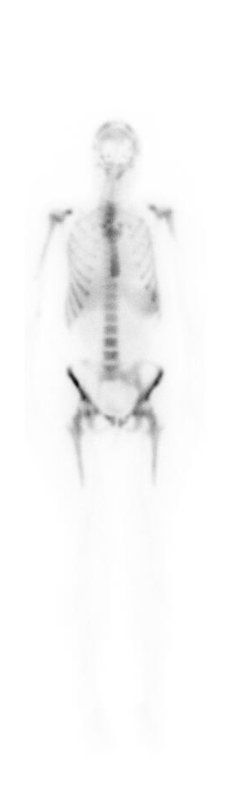

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
prediction tensor: [[ 2.9602282  3.181689  -3.6254756 -1.6726727]]
score softmax tf.Tensor([0.44267285 0.5524107  0.00061087 0.00430566], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_113.jpg class:besposit, 55.24107360839844


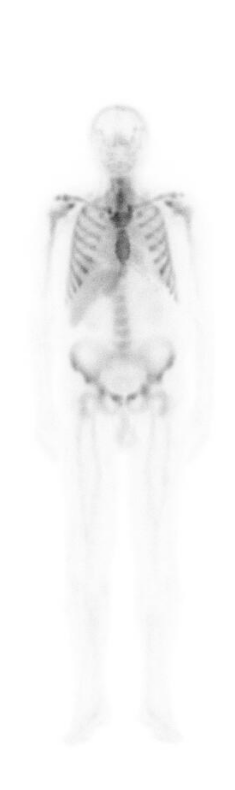

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
prediction tensor: [[ 4.050135   2.2604656 -2.4202967 -1.4845653]]
score softmax tf.Tensor([0.8528703  0.14244244 0.00132072 0.00336661], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_114.jpg class:besnegat, 85.28702545166016


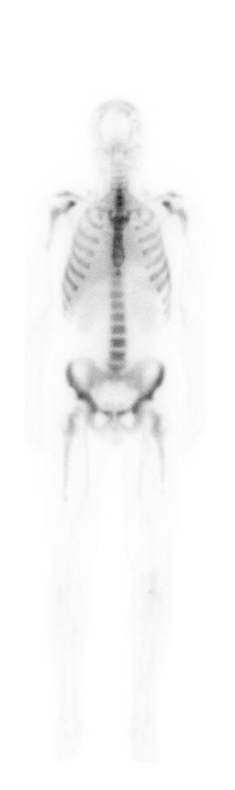

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
prediction tensor: [[ 2.998128   2.3035696 -2.6556692 -1.4952242]]
score softmax tf.Tensor([0.66050977 0.32978916 0.00231455 0.00738654], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_115.jpg class:besnegat, 66.05097961425781


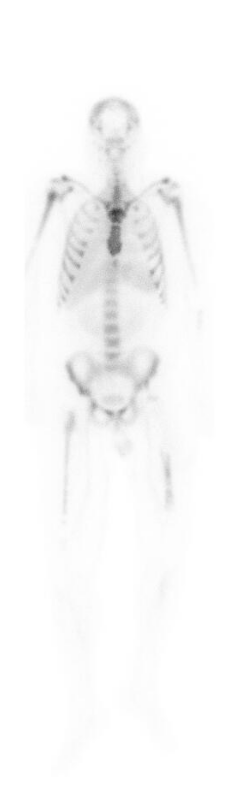

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
prediction tensor: [[ 3.3776853  2.4372027 -2.787652  -1.514409 ]]
score softmax tf.Tensor([0.7142622  0.27887607 0.00150067 0.00536103], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_120.jpg class:besnegat, 71.42621612548828


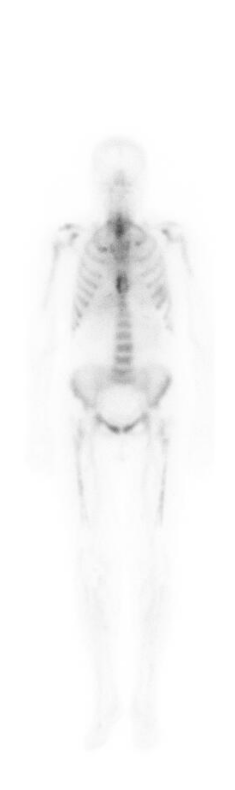

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
prediction tensor: [[ 3.4558325  1.7859381 -2.2309132 -1.1298666]]
score softmax tf.Tensor([0.83204776 0.1566471  0.00282115 0.00848407], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_121.jpg class:besnegat, 83.20477294921875


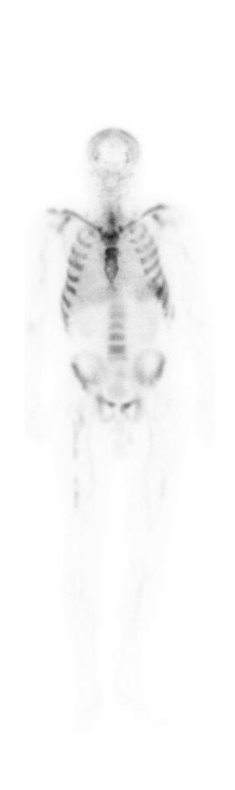

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
prediction tensor: [[ 3.9056187  3.5814314 -3.9687388 -2.2592754]]
score softmax tf.Tensor([5.7950956e-01 4.1905192e-01 2.2043001e-04 1.2180950e-03], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_ap_123.jpg class:besnegat, 57.95095443725586


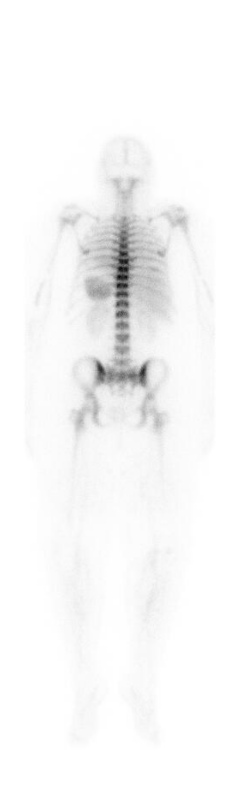

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
prediction tensor: [[ 2.798132    1.2507845  -1.607381   -0.63271695]]
score softmax tf.Tensor([0.7953038  0.16924998 0.00971054 0.0257356 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_238.jpg class:besnegat, 79.53038024902344


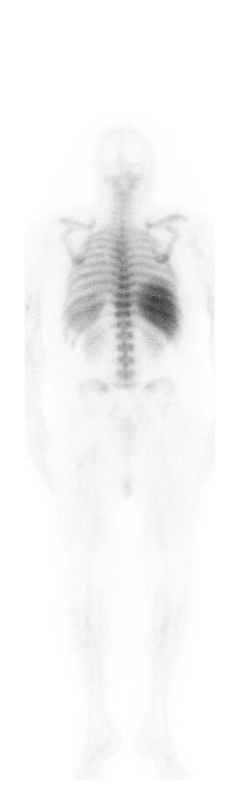

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
prediction tensor: [[ 2.406483   1.440641  -1.5002085 -0.875017 ]]
score softmax tf.Tensor([0.69524527 0.26465386 0.01397924 0.02612166], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_239.jpg class:besnegat, 69.52452850341797


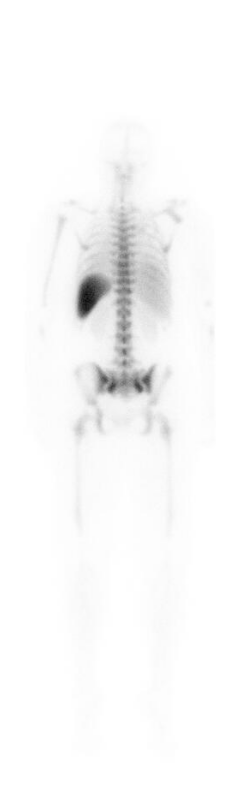

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
prediction tensor: [[ 3.0272777  2.0077112 -2.3167791 -1.2646552]]
score softmax tf.Tensor([0.72505474 0.26156443 0.00346319 0.00991763], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_240.jpg class:besnegat, 72.50547790527344


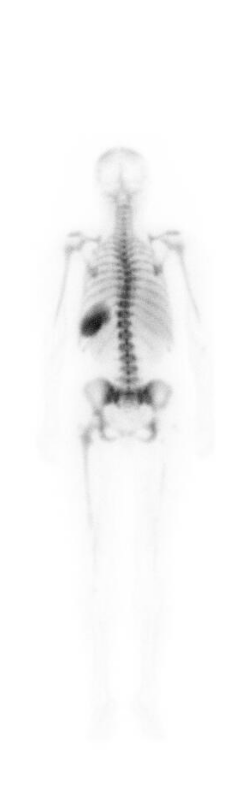

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
prediction tensor: [[ 3.8789537  2.3196726 -2.653536  -1.4754437]]
score softmax tf.Tensor([0.8220507  0.17286673 0.00119639 0.0038861 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_244.jpg class:besnegat, 82.20507049560547


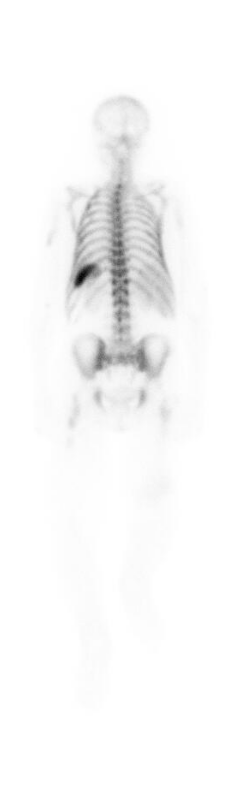

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
prediction tensor: [[ 3.5494032  2.5478766 -3.0129962 -1.5098057]]
score softmax tf.Tensor([0.72722965 0.26712474 0.00102721 0.00461833], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_246.jpg class:besnegat, 72.72296905517578


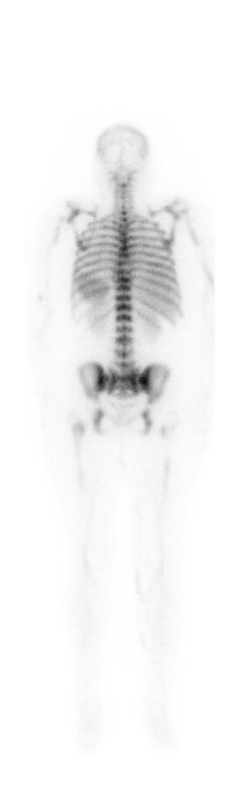

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
prediction tensor: [[ 3.7451153  2.0263658 -2.3935494 -1.1654572]]
score softmax tf.Tensor([0.8411729  0.15081406 0.00181509 0.00619799], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_247.jpg class:besnegat, 84.1172866821289


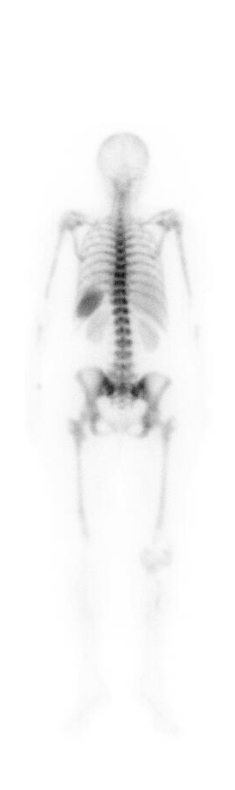

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
prediction tensor: [[ 3.5725026  2.2558134 -2.5916975 -1.3277596]]
score softmax tf.Tensor([0.7827364  0.20978995 0.00164641 0.00582718], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_250.jpg class:besnegat, 78.27364349365234


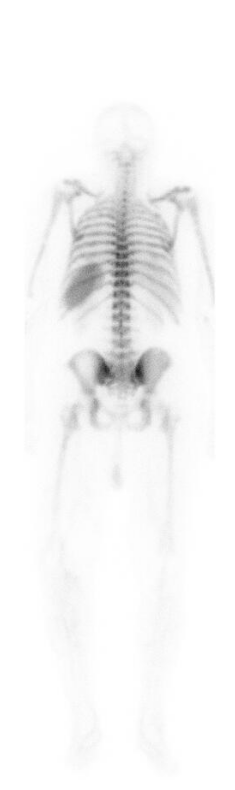

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
prediction tensor: [[ 3.5457668  1.6407057 -1.9257236 -0.9875056]]
score softmax tf.Tensor([0.8592808  0.12787263 0.00361324 0.00923336], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_251.jpg class:besnegat, 85.92808532714844


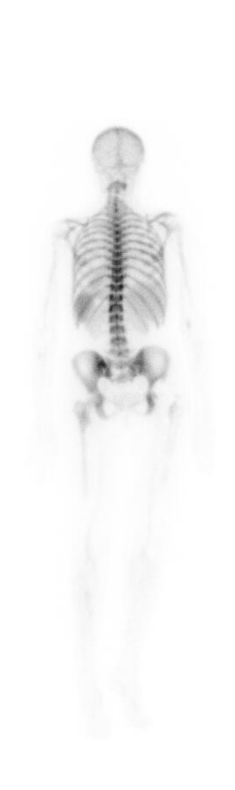

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
prediction tensor: [[ 3.6228242  2.362074  -2.7179136 -1.4226526]]
score softmax tf.Tensor([0.77420795 0.21944249 0.00136493 0.00498465], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_253.jpg class:besnegat, 77.42079162597656


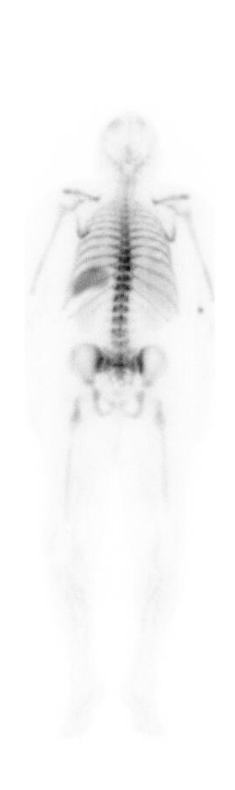

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
prediction tensor: [[ 4.393726   2.4521735 -2.8418038 -1.5339774]]
score softmax tf.Tensor([8.7194139e-01 1.2510705e-01 6.2825589e-04 2.3233702e-03], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/negat_s_pa_27.jpg class:besnegat, 87.19413757324219


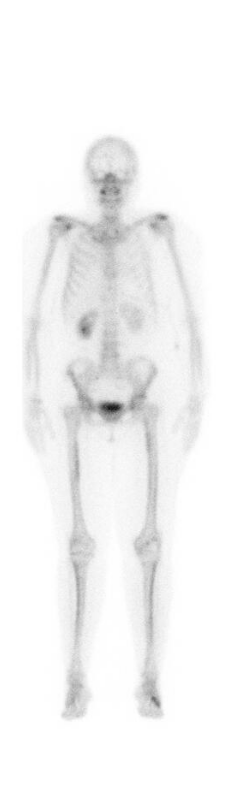

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
prediction tensor: [[-2.5839055 -2.1984522  1.390959   2.8307865]]
score softmax tf.Tensor([0.00356638 0.00524358 0.18988433 0.8013057 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_1.jpg class:bosposit, 80.13056945800781


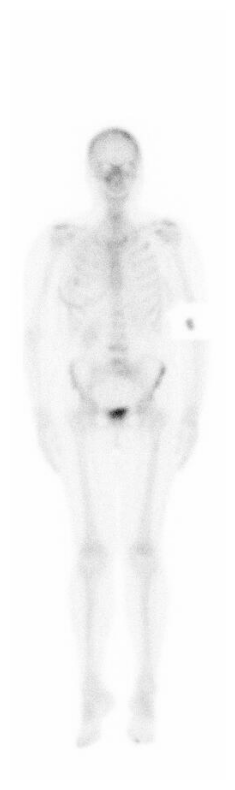

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
prediction tensor: [[-3.1803768 -2.6918108  1.999793   3.0205097]]
score softmax tf.Tensor([0.00148472 0.00242005 0.2638535  0.7322417 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_10.jpg class:bosposit, 73.22416687011719


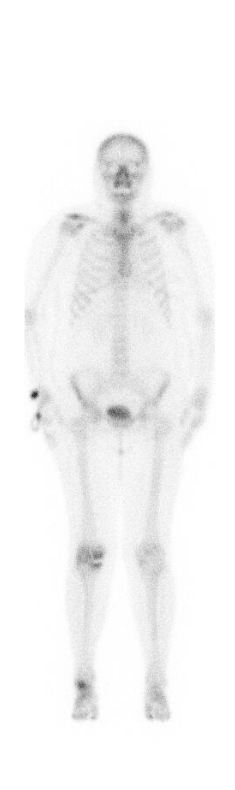

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
prediction tensor: [[-3.2792325 -2.9844246  2.062298   3.2307835]]
score softmax tf.Tensor([0.00113249 0.00152078 0.2364997  0.76084703], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_100.jpg class:bosposit, 76.08470153808594


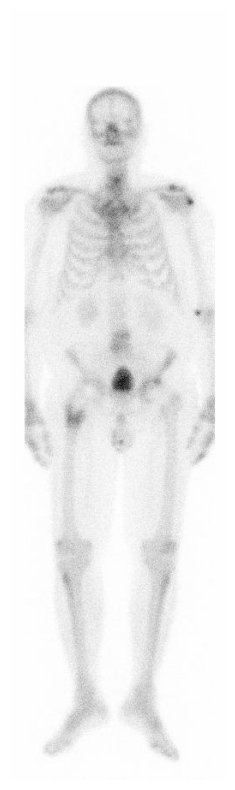

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
prediction tensor: [[-3.762503  -3.1305346  2.2871294  3.6918724]]
score softmax tf.Tensor([4.6420016e-04 8.7330455e-04 1.9680098e-01 8.0186146e-01], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_101.jpg class:bosposit, 80.18614959716797


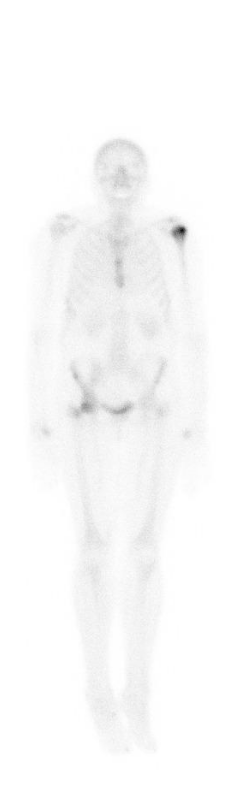

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
prediction tensor: [[-2.2184725 -1.6692728  1.0757354  2.4519026]]
score softmax tf.Tensor([0.00733    0.01269458 0.19758782 0.7823876 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_102.jpg class:bosposit, 78.23876190185547


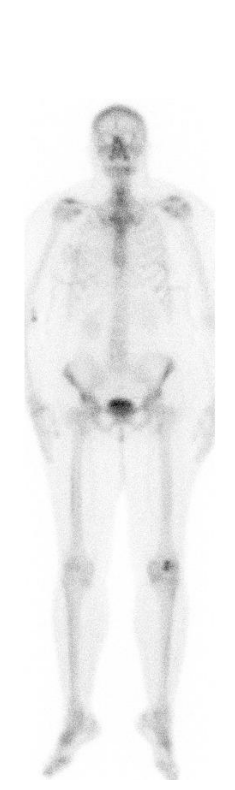

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
prediction tensor: [[-3.4134266 -3.3374333  2.6404238  2.8840804]]
score softmax tf.Tensor([0.00102982 0.00111113 0.4384447  0.5594143 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_103.jpg class:bosposit, 55.94143295288086


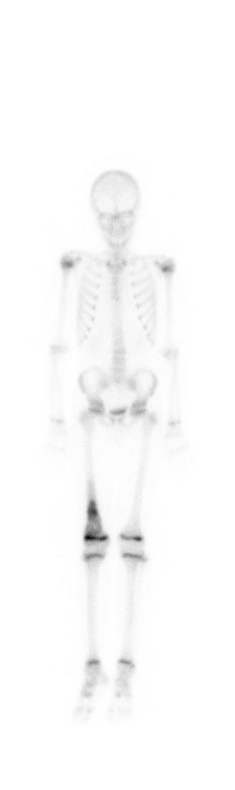

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
prediction tensor: [[-2.0143416 -1.7807825  1.4256692  1.5402583]]
score softmax tf.Tensor([0.01461471 0.01845966 0.4557933  0.5111323 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_104.jpg class:bosposit, 51.11323165893555


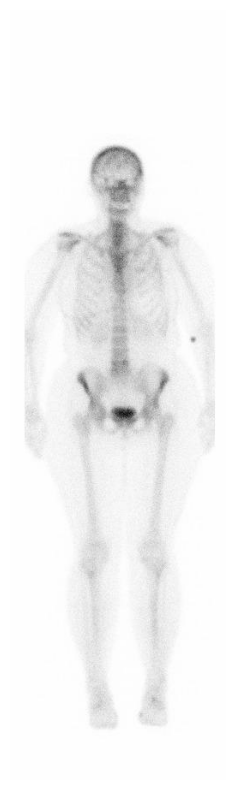

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
prediction tensor: [[-3.32657   -2.7378957  1.9680856  3.379581 ]]
score softmax tf.Tensor([0.00098088 0.00176716 0.1954597  0.80179226], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_105.jpg class:bosposit, 80.17922973632812


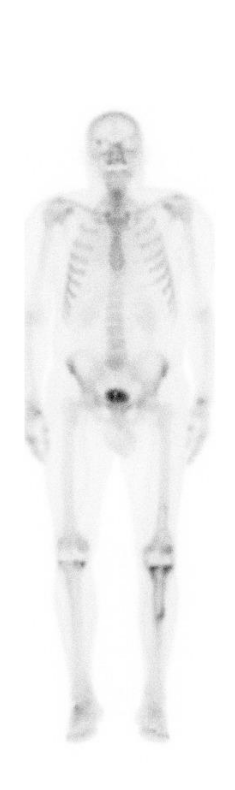

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
prediction tensor: [[-2.698229  -2.196509   1.5945946  2.7984722]]
score softmax tf.Tensor([0.00312783 0.0051658  0.22887208 0.7628343 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_107.jpg class:bosposit, 76.28343200683594


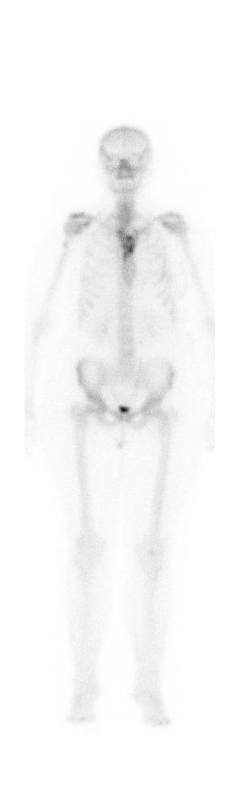

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
prediction tensor: [[-2.4594562 -3.0905626  2.2593715  1.9247929]]
score softmax tf.Tensor([0.00516137 0.00274587 0.57826406 0.41382864], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_ap_108.jpg class:bosnegat, 57.8264045715332


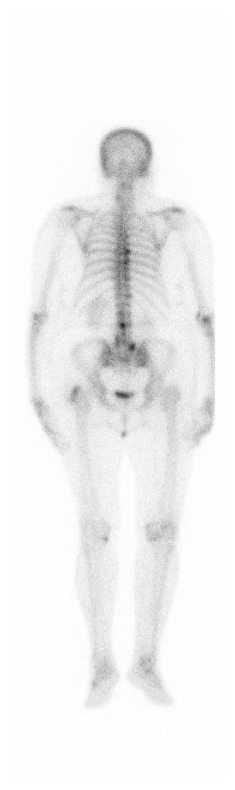

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
prediction tensor: [[-3.2778587 -3.133253   2.2353282  3.340017 ]]
score softmax tf.Tensor([0.00100155 0.00115738 0.24832508 0.74951595], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_219.jpg class:bosposit, 74.95159149169922


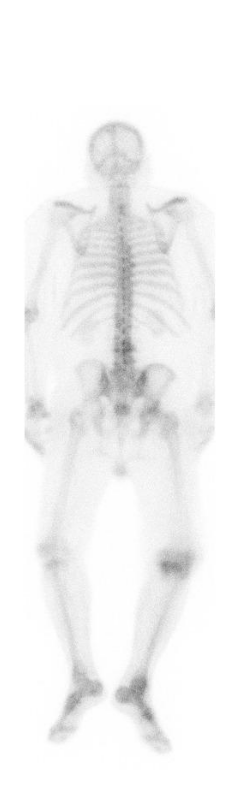

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
prediction tensor: [[-2.5434666 -2.0977516  1.6211811  2.414737 ]]
score softmax tf.Tensor([0.00477853 0.00746218 0.30759382 0.6801654 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_220.jpg class:bosposit, 68.01654052734375


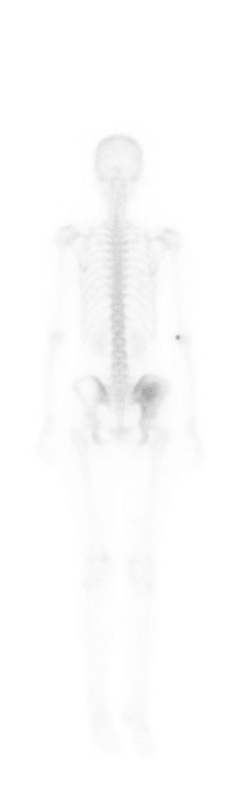

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
prediction tensor: [[-1.5950019 -1.6428462  1.2239304  1.3552601]]
score softmax tf.Tensor([0.02643881 0.02520364 0.44308656 0.505271  ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_221.jpg class:bosposit, 50.527103424072266


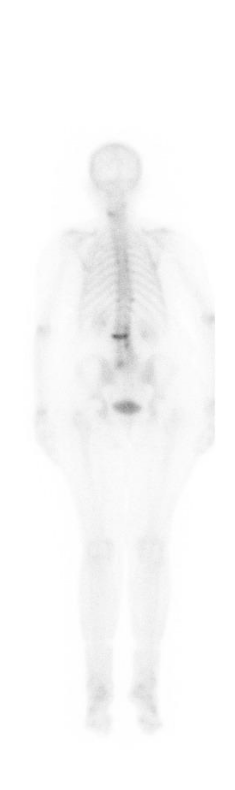

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
prediction tensor: [[-2.290269  -2.256871   1.7089134  2.2027566]]
score softmax tf.Tensor([0.0068503  0.00708295 0.37370807 0.6123586 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_222.jpg class:bosposit, 61.235862731933594


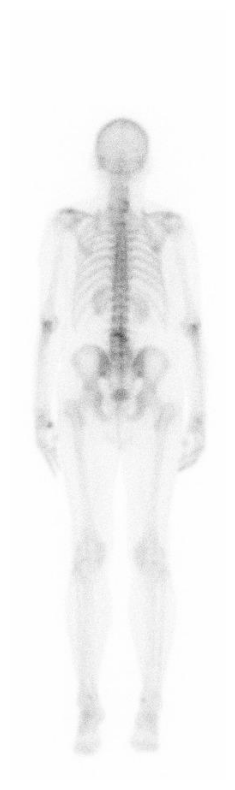

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
prediction tensor: [[-2.7679834 -2.675165   2.1083663  2.3759186]]
score softmax tf.Tensor([0.00328266 0.00360193 0.43052357 0.56259185], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_224.jpg class:bosposit, 56.259185791015625


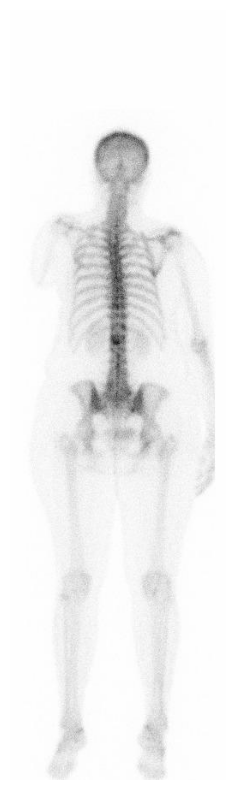

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
prediction tensor: [[-3.0067315 -3.411687   2.5616934  2.7309017]]
score softmax tf.Tensor([0.00174211 0.001162   0.45646906 0.5406268 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_225.jpg class:bosposit, 54.06268310546875


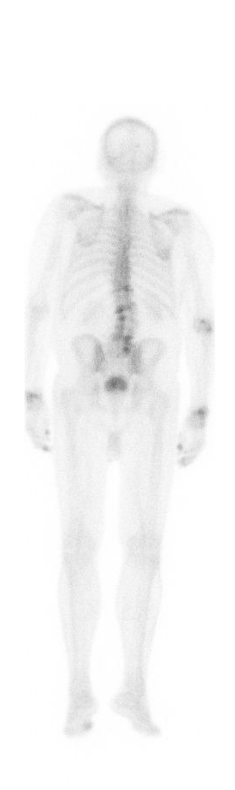

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
prediction tensor: [[-2.9511511 -2.61538    1.8356247  3.1301196]]
score softmax tf.Tensor([0.00178604 0.0024987  0.21417136 0.7815439 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_226.jpg class:bosposit, 78.15438842773438


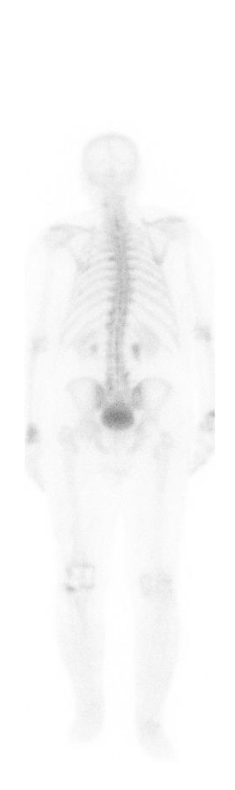

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
prediction tensor: [[-2.0648623 -2.6636202  1.8919926  2.1012194]]
score softmax tf.Tensor([0.00845277 0.00464474 0.4420171  0.5448854 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_227.jpg class:bosposit, 54.48854064941406


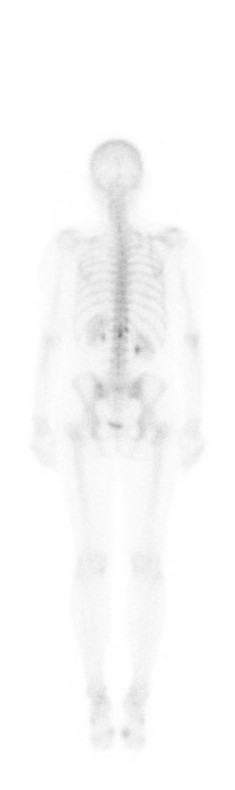

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
prediction tensor: [[-2.3960571 -2.5329843  1.9775459  2.1112986]]
score softmax tf.Tensor([0.00581792 0.00507342 0.46152958 0.5275791 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_228.jpg class:bosposit, 52.757911682128906


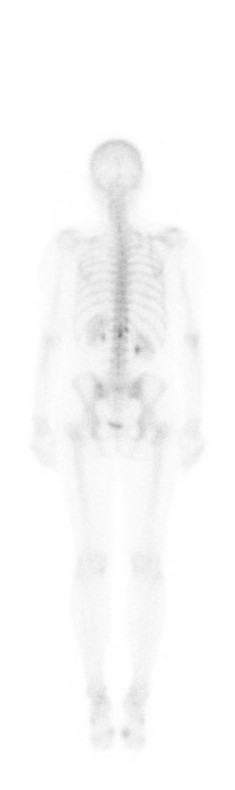

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
prediction tensor: [[-2.3960571 -2.5329843  1.9775459  2.1112986]]
score softmax tf.Tensor([0.00581792 0.00507342 0.46152958 0.5275791 ], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_bs_pa_229.jpg class:bosposit, 52.757911682128906


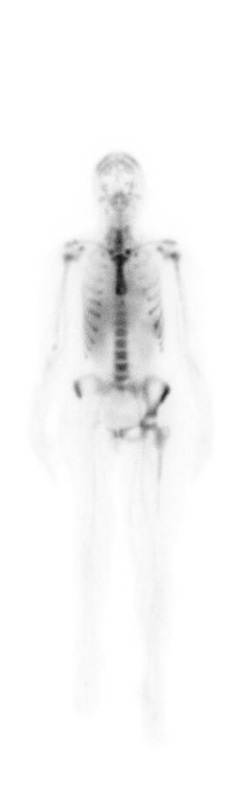

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
prediction tensor: [[ 2.918821   2.2714808 -2.8197691 -1.2972211]]
score softmax tf.Tensor([0.6487557  0.33958218 0.00208854 0.00957365], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_10.jpg class:besnegat, 64.87557220458984


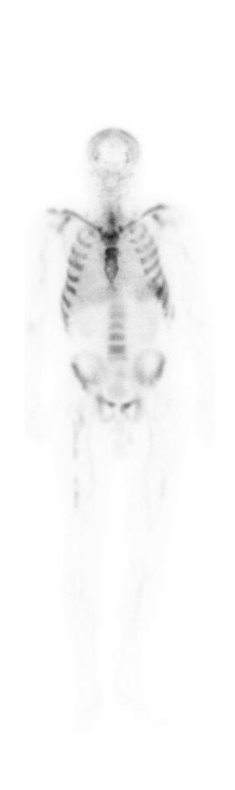

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
prediction tensor: [[ 3.9056187  3.5814314 -3.9687388 -2.2592754]]
score softmax tf.Tensor([5.7950956e-01 4.1905192e-01 2.2043001e-04 1.2180950e-03], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_100.jpg class:besnegat, 57.95095443725586


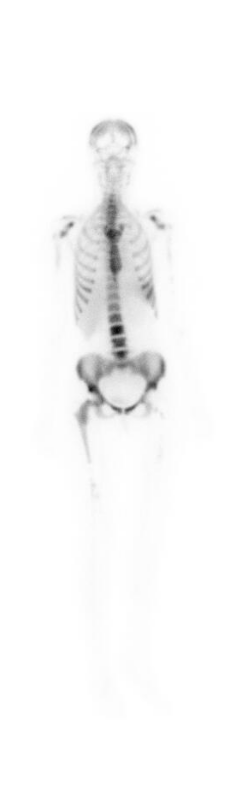

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
prediction tensor: [[ 2.5443397  3.5233665 -3.5082245 -1.9117076]]
score softmax tf.Tensor([2.7204782e-01 7.2415441e-01 6.3980854e-04 3.1579742e-03], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_103.jpg class:besposit, 72.41544342041016


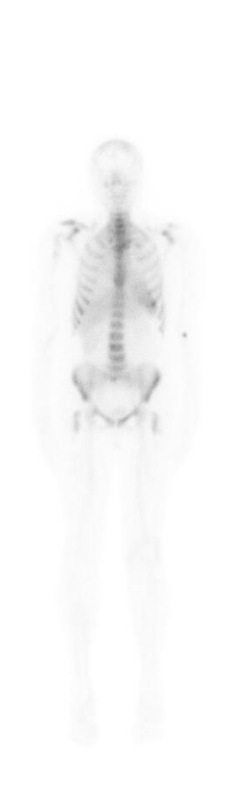

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
prediction tensor: [[ 2.8044581  2.0973656 -2.4405699 -1.2520107]]
score softmax tf.Tensor([0.65977883 0.32532093 0.00347946 0.01142079], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_104.jpg class:besnegat, 65.9778823852539


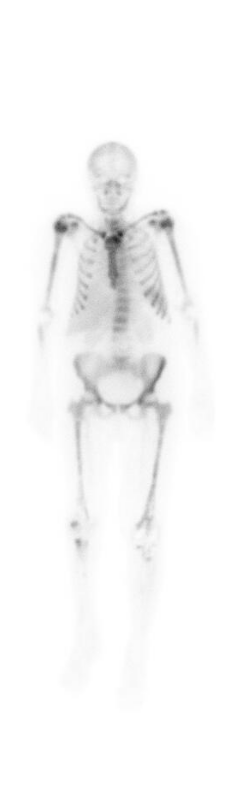

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
prediction tensor: [[ 1.8467637  2.3208814 -2.006976  -1.5200015]]
score softmax tf.Tensor([0.37561545 0.6034623  0.00796316 0.01295913], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_105.jpg class:besposit, 60.346229553222656


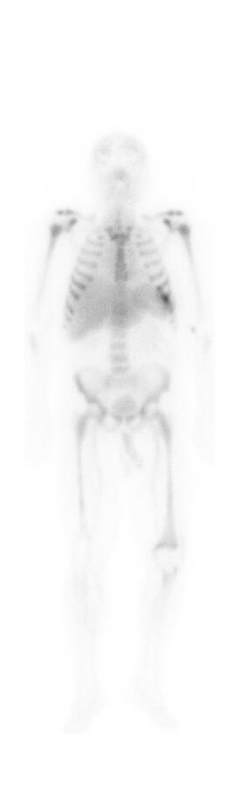

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
prediction tensor: [[ 3.1777244  2.3473527 -2.3751526 -1.5372164]]
score softmax tf.Tensor([0.6902626  0.3008767  0.00267566 0.00618502], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_106.jpg class:besnegat, 69.02626037597656


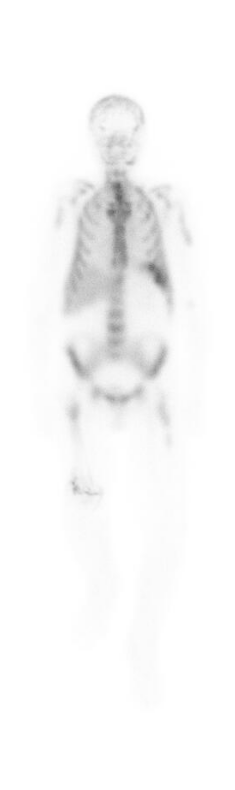

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
prediction tensor: [[ 1.9865043  3.1744099 -3.4355028 -1.0421689]]
score softmax tf.Tensor([0.23078687 0.757028   0.00101968 0.01116542], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_107.jpg class:besposit, 75.70279693603516


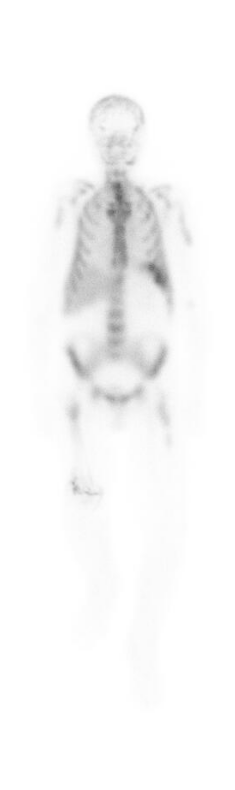

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
prediction tensor: [[ 1.9865043  3.1744099 -3.4355028 -1.0421689]]
score softmax tf.Tensor([0.23078687 0.757028   0.00101968 0.01116542], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_108.jpg class:besposit, 75.70279693603516


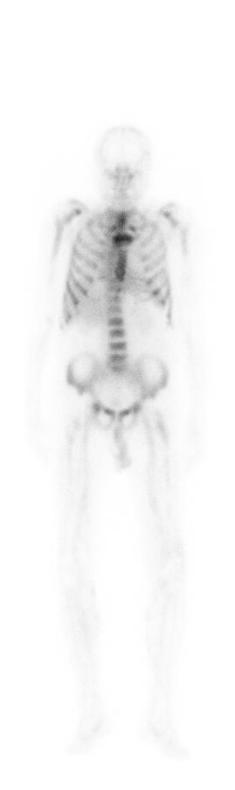

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
prediction tensor: [[ 3.536734   1.7725447 -2.0554118 -0.9644897]]
score softmax tf.Tensor([0.8430651  0.14443864 0.00314212 0.00935415], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_11.jpg class:besnegat, 84.30651092529297


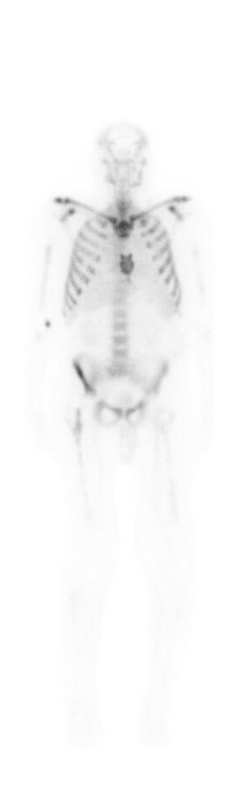

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
prediction tensor: [[ 3.192742   3.5994706 -3.7459788 -2.0842257]]
score softmax tf.Tensor([3.9872828e-01 5.9884852e-01 3.8657061e-04 2.0366623e-03], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_ap_110.jpg class:besposit, 59.88485336303711


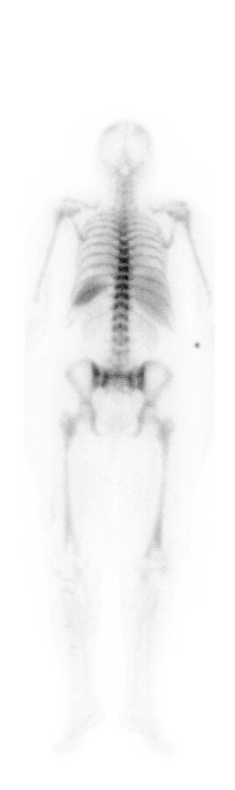

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
prediction tensor: [[ 3.554466   2.2949057 -2.8242104 -1.3197114]]
score softmax tf.Tensor([0.77332485 0.21945317 0.00131262 0.00590927], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_29.jpg class:besnegat, 77.33248138427734


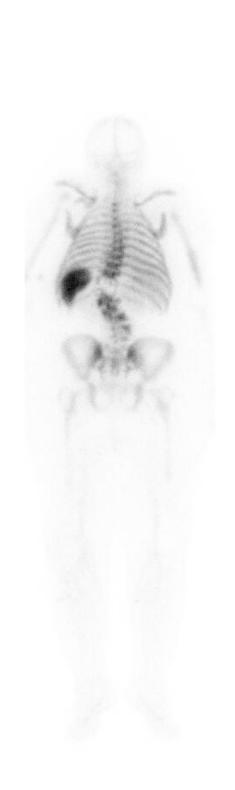

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
prediction tensor: [[ 3.1211164  1.5614337 -2.020878  -0.8832295]]
score softmax tf.Tensor([0.81018573 0.17030327 0.00473636 0.01477472], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_36.jpg class:besnegat, 81.01856994628906


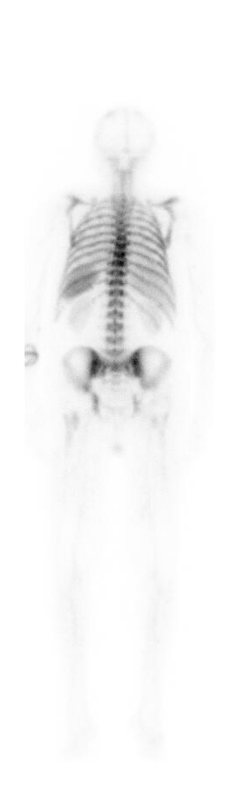

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
prediction tensor: [[ 4.0165763  2.3380299 -2.720296  -1.3700383]]
score softmax tf.Tensor([0.83863854 0.15652776 0.00099492 0.00383882], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_43.jpg class:besnegat, 83.86385345458984


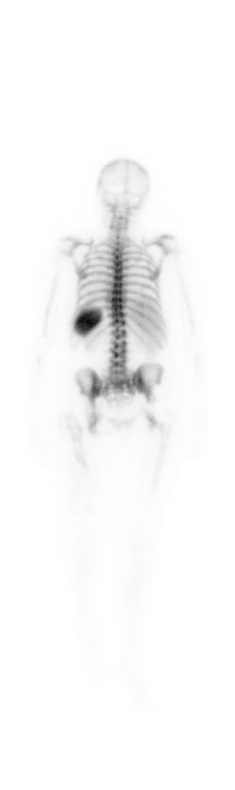

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
prediction tensor: [[ 3.483591   2.2989185 -2.518864  -1.4965987]]
score softmax tf.Tensor([0.7603454  0.23254883 0.00188009 0.00522567], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_47.jpg class:besnegat, 76.03453826904297


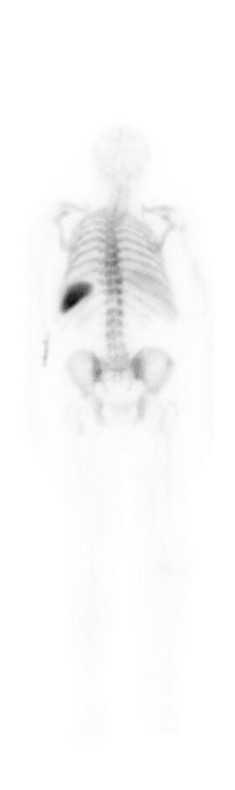

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
prediction tensor: [[ 3.170711   2.2110994 -2.3741145 -1.5127114]]
score softmax tf.Tensor([0.7162315  0.27434647 0.00279876 0.00662322], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_51.jpg class:besnegat, 71.62315368652344


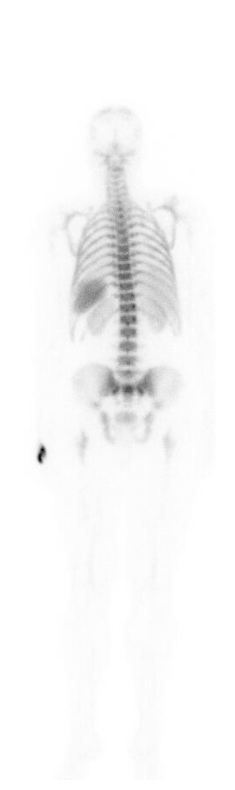

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
prediction tensor: [[ 3.4662523  2.2245    -2.5797539 -1.3578268]]
score softmax tf.Tensor([0.7696578  0.22233686 0.00182201 0.00618339], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_62.jpg class:besnegat, 76.96578216552734


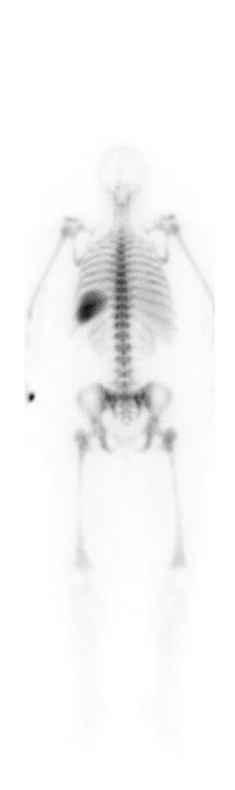

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
prediction tensor: [[ 3.945705   2.5103343 -2.853881  -1.5628481]]
score softmax tf.Tensor([0.8043802  0.19146429 0.00089627 0.00325932], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_63.jpg class:besnegat, 80.43801879882812


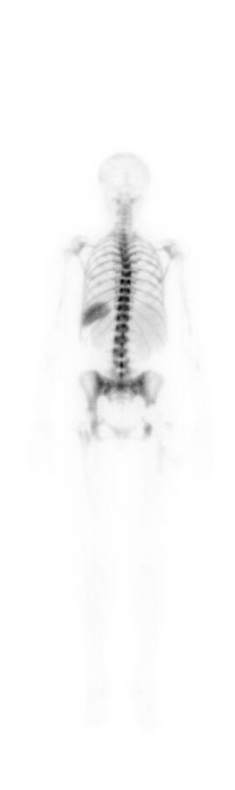

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
prediction tensor: [[ 3.6875339  2.6244369 -2.8968327 -1.7043219]]
score softmax tf.Tensor([0.7400173  0.2555905  0.00102256 0.00336968], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_69.jpg class:besnegat, 74.0017318725586


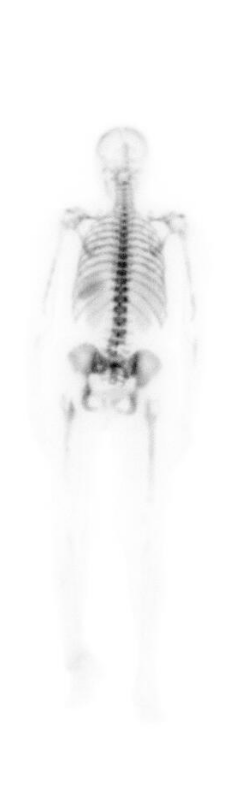

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
prediction tensor: [[ 2.5423152  1.21148   -1.5141149 -0.7033899]]
score softmax tf.Tensor([0.7572841  0.2001172  0.01310913 0.02948947], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_77.jpg class:besnegat, 75.72840881347656


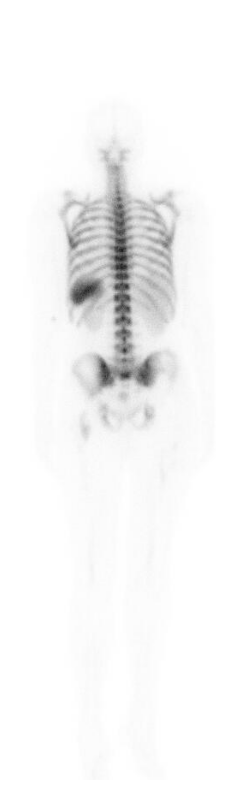

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
prediction tensor: [[ 3.3448446  1.9556422 -2.3652675 -1.2039707]]
score softmax tf.Tensor([0.79166156 0.1973407  0.00262222 0.00837557], shape=(4,), dtype=float32)
/mnt/c/AIFolder/offline/test4class/posit_s_pa_79.jpg class:besnegat, 79.16615295410156
Final results
[['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_106.jpg'
  'bosposit, 51.31560516357422']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_113.jpg'
  'bosnegat, 68.58824157714844']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_120.jpg'
  'bosposit, 55.75187301635742']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_123.jpg'
  'bosnegat, 75.40535736083984']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_124.jpg'
  'bosnegat, 73.17085266113281']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_127.jpg'
  'bosposit, 58.959136962890625']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_13.jpg'
  'bosposit, 53.76655578613281']
 ['/mnt/c/AIFolder/offline/test4class/negat_bs_ap_1

In [4]:
import PIL.Image as Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
%config IPCompleter.greedy=True
#from where to load the images
testPath = Path('/mnt/c/AIFolder/offline/test4class')
#classes to be infered
class_names=['besnegat','besposit','bosnegat','bosposit']
#path to the model to use 
model_path = Path("/mnt/c/AIFolder/offline/save_at_160_w11.keras")
#form teaplte to create the dynamic path to files
pathFile = '{}/{}'
#loading the model
model = tf.keras.models.load_model(model_path)

files = os.listdir(testPath);
print(files)

#creating the empty list
result = np.empty(shape=(len(files),2),dtype=object)


def predictImage(fileName,index):
  img = tf.keras.preprocessing.image.load_img(fileName, target_size=(900,252))
  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  Y = tf.keras.preprocessing.image.img_to_array(img)
  X = np.expand_dims(Y,axis=0)
  #tensor of prediction
  val1 = model.predict(X)
  print("prediction tensor:",val1)
  #softamx calculates the probability distribution among the results creating another tensor with final results
  score2 = tf.nn.softmax(val1[0])
  print("score softmax", score2)
  print(f"{fileName} class:{(class_names[np.argmax(score2)])}, {100 * np.max(score2)}")
  #we add all to the list
  result[index]=[fileName,f"{(class_names[np.argmax(score2)])}, {100 * np.max(score2)}"]
#loading all files from the directory



index = 0
for file in files:
    finalFile = f"{testPath}/{file}"
    predictImage(finalFile,index)
    index +=1
print("Final results")
print(result)

# Correctly Resize the image and rotate it based on the EXIF tag
- this script serves as a helping tool in case of using to predict an image from a monitor screen taken by mobile camera
- resizes the image
- checks EXIF information -> correct angle of rotation
- adapts resize filter -> Bicubic, can be change to any filter eg. Lancoz
- The result is an image of the correct size, moire noise is lowered so the prediction is more accurate

In [ ]:
from PIL import Image, ImageFilter
from PIL.ExifTags import Base
model_width = 252
model_height = 900

TESTFILE = "c:/web/nuclearpacs/public"

def resize_image(image):
    i_width, i_height = image.size
    exif = image.getexif()
  
    if 274 in exif:
        rotate = True     
    else:
        rotate = False
        
    print("Exif tag:",Base(274).name)
    percentage_h = model_height / i_height
    percentage_w = model_width / i_width
    
    new_width = int(i_width * percentage_w)
    new_height = int(i_height * percentage_h)
    print("New Size", new_width, new_height)
    if rotate:
        if exif[274] == 6:
            image = image.rotate(-90,expand=1)
        if exif[274] == 8:
            image = image.rotate(90,expand=1)
    image = image.resize((new_width, new_height), Image.Resampling.BICUBIC)
    return image.filter(ImageFilter.BLUR)

pathFile = '{}/{}'
if __name__ == "__main__":
  file_name = sys.argv[1]
  identifier = sys.argv[2]
  extension = sys.argv[3]
finalFile = pathFile.format(TESTFILE,file_name)
image = Image.open(finalFile)
new_image = resize_image(image)

save_file_tpl = "{}/final_{}.{}"
finalSave = save_file_tpl.format(TESTFILE,identifier,extension)
n_image.save(finalSave)


# Color channel harmonization
- takes a grayscale image with one color channel and makes it an RGB grayscale image with three channels
- in short, it just copies the one channel into the two remaining, for a grayscale image it does not compose a problem

In [ ]:
from PIL import Image, ImageFilter
import os
import numpy

testPath = '/mnt/c/AIFolder/datasets/besbos7'
outPath = '/mnt/c/AIFolder/datasets/besbos6a'
class_names = ["besnegat","besposit","bosnegat","bosposit"]
main_path = '/mnt/c/AIFolder/datasets/besbos7'

def expand_greyscale_image_channels(grey_pil_image):
    grey_image_arr = np.asarray(grey_pil_image)
    print("one array", grey_image_arr.shape)
    #print("shape[2]==3",grey_image_arr.shape[2])
    if len(grey_image_arr.shape) == 3 and grey_image_arr.shape[2]==3:
        print("image has 3 channels")
    elif len(grey_image_arr.shape) == 2:
        print("Image is one channel, adapting")
        grey_image_arr = np.expand_dims(grey_image_arr, -1)
        #just simply adding the same one channel to all other channels
        grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
        return Image.fromarray(grey_image_arr_3_channel.astype('uint8'),'RGB')
    else:
        print("Image has unknown channels")
        
    return Image.fromarray(grey_image_arr.astype('uint8'),'RGB')

for item in class_names:
    path =f"{main_path}/{item}/"
    print("class-",item)
    files = os.listdir(path);
    for file in files:
        print("file to change:",file)
        img = Image.open(f"{path}/{file}")
        img2 = expand_greyscale_image_channels(img)
        img2.save(f"{outPath}/{item}/{file}")
    


# Pre-training augmentation
- the image is vertically flipped and saved
- this is a part of augmentation technique to control the amount of data in the class

In [ ]:

from PIL import Image, ImageFilter, ImageEnhance
import 

PATH = 'c:/temp/besbos7/besposit_pa/'
PATH_TO_CLASS = "c:/temp/besbos5a/bosnegat"
files = os.listdir(PATH)
filesCount = len(files)
print("Data:",filesCount)
index = 1
for index in range(1,3):
    for file in files:
        if index == 1:
            img = Image.open(f"{PATH}{file}")
            imgFlip = img.transpose(Image.ROTATE_180)
            imgFlip.save(f"{PATH}f_{file}")
            print("Flipped image:f_",file);
        if index == 3:
            img = Image.open(f"{PATH_TO_CLASS"/{file}")
            imgE = ImageEnhance.Contrast(img)
            img_final = imgE.enhance(2.5)
            img_final.save(f"{PATH_TO_CLASS}/c_{file}")
            print("Contrasted image:c_",file)
    
